# K-Nearest-Neighbors
KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting 
of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a
function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

# Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

# Problem statement

Dataset:
The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald 
Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals.

Source: https://archive.ics.uci.edu/ml/datasets/Iris

Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.

# Question 1
Import libraries and load the dataset

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
  
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
data.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,6.5,3.0,5.2,2.0,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica
99,5.7,2.8,4.1,1.3,Iris-versicolor
149,5.9,3.0,5.1,1.8,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
19,5.1,3.8,1.5,0.3,Iris-setosa
69,5.6,2.5,3.9,1.1,Iris-versicolor
40,5.0,3.5,1.3,0.3,Iris-setosa
103,6.3,2.9,5.6,1.8,Iris-virginica


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Pre-processing

# Question 2 - Estimating missing values
Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have 
to see how to replace those missing values with some estimated values (median)

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(data.iloc[:,:-1])
imputed_data = imputer.transform(data.iloc[:,:-1].values)
data.iloc[:,:-1] = imputed_data

In [ ]:
iris = data

# Question 3 - Dealing with categorical data
Change all the classes to numericals (0to2).

In [ ]:
iris.iloc[:,4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()

iris.iloc[:,-1] = class_label_encoder.fit_transform(iris.iloc[:,-1])

In [ ]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.iloc[:,-1].unique()

array([0, 1, 2])

# Question 4
Observe the association of each independent variable with target variable and drop variables from feature set having correlation 
in range -0.1 to 0.1 with target variable.

In [ ]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


# Question 5
Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). 
They will be having almost no influence on the classification.

In [ ]:
iris.var()

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
Species          0.671141
dtype: float64

# Question 6
Plot the scatter matrix for all the variables.

In [ ]:
data = pd.DataFrame(iris)

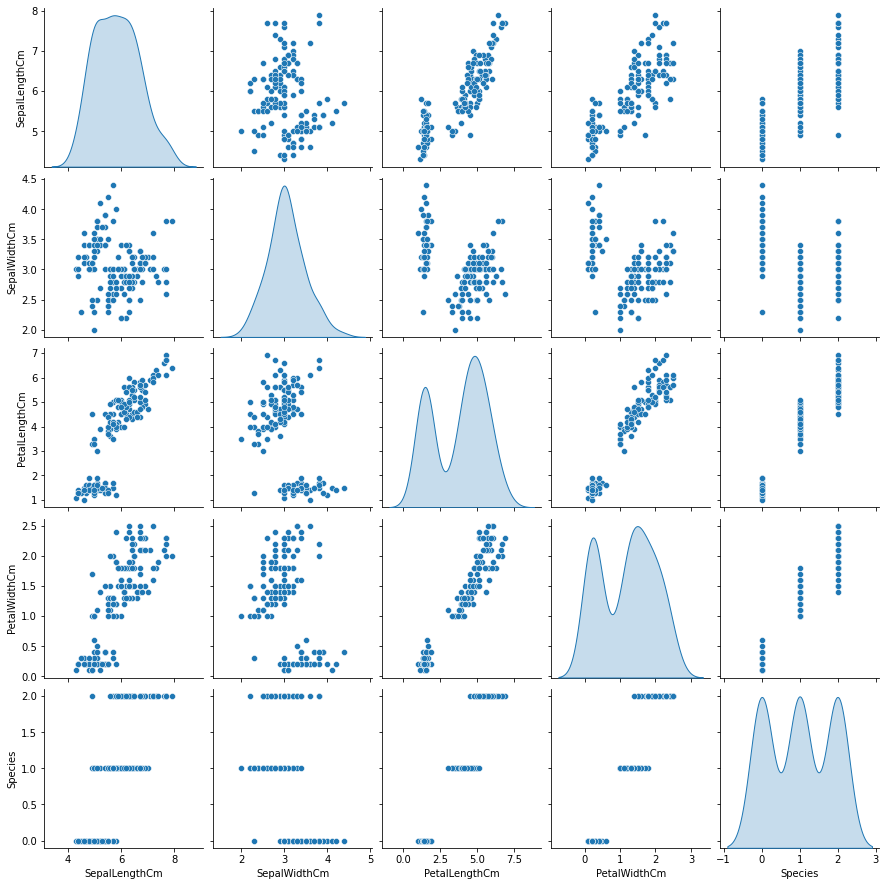

In [ ]:
sns.pairplot(iris, diag_kind = 'kde')

# Split the dataset into training and test sets

# Question 7
Split the dataset into training and test sets with 80-20 ratio.

In [ ]:
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = iris.drop(['Species'], axis=1)
y = iris['Species']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)


# Question 8 - Model
Build the model and train and test on training and test sets respectively using scikit-learn. Print the Accuracy of the model with different values of k=3,5,9.

Hint: For accuracy you can check accuracy_score() in scikit-learn

In [ ]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.9
0.9
0.9


# Question 9 - Cross Validation
Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the 
model with lowest MSE

In [ ]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [ ]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


# Question 10
Plot misclassification error vs k (with k value on X-axis) using matplotlib.

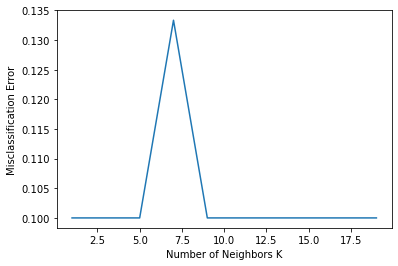

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()